In [1]:
%load_ext autoreload
%autoreload 2

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from omegaconf import OmegaConf
import datetime
import os
import torch
from pkg import DEVICE
from utils import NEURONS_302
from models._utils import *
from scipy import stats

In [73]:
%matplotlib inline

In [48]:
sl_log_dir = '/om2/user/lrvenan/worm-graph/logs/SGD_rnn/num_worms' # Path to the folder with all logs from the scaling laws experiment

# Time per epoch
---

- Time per epoch vs. number of worms
- Time per epoch vs. numer of named neurons

In [69]:
def time_per_epoch_plot(exp_log_dir, key='num_worms'):
    if key == 'num_worms':
        key_name = 'Number of worms'
    elif key == 'num_named_neurons':
        key_name = 'Number of named neurons'
    else:
        raise ValueError('key must be num_worms or num_named_neurons')

    # Store seconds per epoch, number of named neurons and number of worms
    seconds_per_epoch = []
    num_named_neurons = []
    num_worms = []

    # Loop over all folders inside the log directory
    for folder in os.listdir(sl_log_dir):
        # Load the config file inside each folder
        config = OmegaConf.load(os.path.join(sl_log_dir, folder, 'config.yaml'))
        # Extract seconds_per_epoch from the config file
        seconds_per_epoch.append(config['globals']['seconds_per_epoch'])
        # Extract num_named_neurons from the config file
        num_named_neurons.append(config['dataset']['num_named_neurons'])
        # Extract num_worms from the config file
        num_worms.append(config['dataset']['num_worms'])

    # Create a dataframe with the seconds per epoch, number of named neurons and number of worms
    df = pd.DataFrame({'seconds_per_epoch': seconds_per_epoch, 'num_named_neurons': num_named_neurons, 'num_worms': num_worms})

    # Plot the seconds per epoch vs the number of worms
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.scatterplot(data=df, x='num_worms', y='seconds_per_epoch', ax=ax)
    # Use log scale for the x axis and y axis
    ax.set_xscale('log')
    ax.set_yscale('log')
    # Use whitegrid style
    sns.set_style('whitegrid')
    # Set the x axis and y axis labels according to the key
    plt.xlabel(key_name)
    plt.ylabel('Seconds per epoch')
    # Set title according to the key
    plt.title('Seconds per epoch vs {}'.format(key_name))

    # Return df, fig and ax so we can customize the plot if we want
    return df, fig, ax

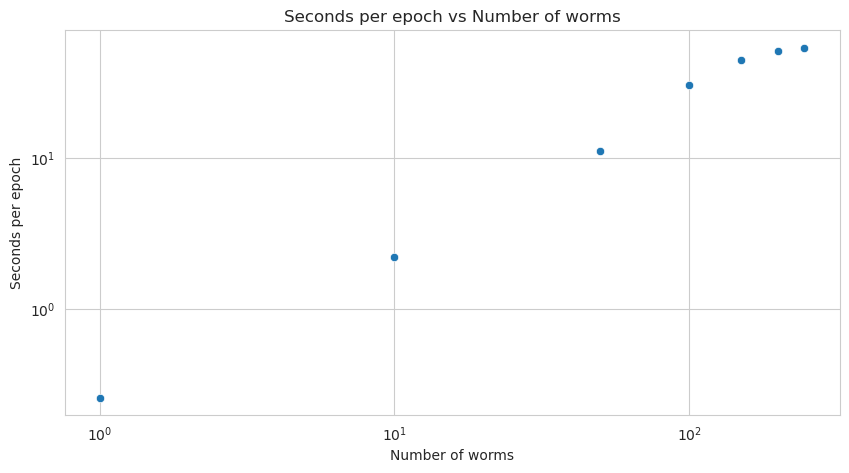

In [74]:
df, fig, ax = time_per_epoch_plot(sl_log_dir, key='num_worms')

In [79]:
# Regression line for the plot above
slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(df['num_worms']), np.log(df['seconds_per_epoch']))
print('Regression line: y = {}x + {}'.format(slope, intercept))
# Add the regression line to the plot above using sns lineplot
x = np.linspace(1, 100000, 246)
y = np.exp(intercept) * x ** slope
sns.lineplot(x=x, y=y, ax=ax, dashes=True, size=1.5, color='red')
# Add the equation of the regression line to the plot above
ax.text(0.5, 0.5, 'y = {}x + {}'.format(round(slope, 2), round(intercept, 2)), transform=ax.transAxes, fontsize=14, verticalalignment='top')
# Save the plot
fig.savefig('seconds_per_epoch_vs_num_worms.png', dpi=300)

Regression line: y = 1.0088299121130848x + -1.4108689110591959
